# Deep Learning Project : FashioNet

## Personal fashion expert and shopping companion

## By : Plaban Mohanty - pm2878  &   Aliraza Punjani -  amp2280

#### Objectives :

In FashioNet we aim to build a fashion recommendation system capable of learning a person’s clothing style and preferences by extracting the a variety of attributes from his/her clothing images. These attributes are then fed to a similarity model to retrieve most closest similar images as recommendations.


#### Approach:
We planned to train a convolutional deep net, capable of performing multi-class, multi-label classification. So each clothing article can have one or more clothing attributes attached to it, with each attribute itself having classes. We decided to go for attributes like Pattern [checkered, striped, floral, graphic, solid], Fabric [cotton, chiffon, lace, wool, silk] , Style [casual, formal, party, winter, summer], Shape [full-sleeve, half-sleeve, sleeveless] . For each clothing image the network would output, what we’d like to call, a Fashion Vector. A Fashion Vector is basically a vector with attributes as the dimensions and the attribute class as the value. It’d look like [attribute1_class, attribute2_class, attribute3_class, ...]
[checkered, cotton, formal, ...]. 
These fashion vectors will be used to create a similarity model to provide recommendations.

#### Attempted Models:
We planned to use domain transfer to cut down on training time. The dataset that we initially used was DeepFashion database. This database comprised of more than 60k images that belonged to over 1000 attributes.
We began with testing out the dataset on a modified VGG architecture with a dense output layer of 1000 neurons. Given such large number of attributes, there was a lot of sparsity in the data. This meant the network had no incentive to predict presence of an attribute and rather just marked all attributes as absent. To tackle this class imbalance we had to incorporate a customized weighted loss. To implement weighted loss in keras we had to use Graph model with a shared backbone and 1000 output layer with 1 neuron each. The model was penalized comparatively more for misclassifying class 1 than 0 for each attribute. However, the sparsity and class imbalance was too high to be managed by weighted loss. The network stalled on about 30% validation accuracy and wouldn’t train further. We decide to construct our own database and modify the network architecture to fit the new dataset.


#### Dataset : 
The final dataset that we used was comprised of about 50000 images that we collected from the internet by scraping the web and various clothing retail sites. The dataset collected was highly specific to train our models . We listed the specific features required to form our feature vector and extracted images specific to the classes of this features. 
 We invested heavily on data preprocessing so that the network would not have any data specific issues. We did a automated curating and cleaning of data to eliminate duplicates and non relevant images. We then did a manual check to eliminate images that were not specific to the class they were meant to belong to for training. We ran the data sets on simple neural networks to check if they performed well enough to be used in the main model. 
Once we were satisfied with the performance , we used the images as the training and validation dataset and separated out a well represented section for test. (7:1.5:1.5)
 

#### Implementation
 
To implement the proposed model , we needed to build models to initially classify the categories of features . Using these models, we form the fashion vector i.e a vector with all categories of features classified for each image . With these vectors ,w
e build a style profile for a user based on the input images . We match this profile with fashion vectors of images in repository to form the best suited recommendations
 
##### a.    Network architecture
 
We use Keras wrapper for tensorflow and VGG16 model as the base of the network.
The base of our network is VGG16. On top of the network , we add a customized dense layer of 512 neurons with RELU activation. For the final classification, we use a softmax layer of n output neurons where n is the no of subclasses for each category of feature
We use pre-trained VGG16 model on ImageNet as the starting weights / parameters .
 
Now, we build m such networks , each to train one category of feature (where m is the total no of categories of features , 5 in our case) and use a stacked version of these networks .
 
With this stacked CNNs , each input image entered is classified into one of the classes for each category , these classifications are then combined to form a Fashion Vector for that image
 
##### b.   Training
 
As we are performing domain transfer, we freeze the bottom layers of the network i.e the VGG16 layers and train the model on the dataset for 5 epochs .This trains the outer layers to learn to classify the images.
We then unfreeze the lower layers and train the model for 5-7 epochs until the validation accuracy stabilizes.
We store the best possible weights (best on validation accuracy) and use it for the recommendation model.
 
##### c.   Repository Creation
 
To get recommendations ,we needed to build a repository of images . This repository would be application specific .If the recommendation needs to be done for shopping , then the repository would contain images from online retail stores like Amazon,Macy’s etc. We used images scraped from these stores and added scraped images from the web to test our recommendation engine.
We then cleaned the data , and removed the images which were not relevant /noise.
The images were then passed through the network and fashion images were generated from each image .All these vectors were combined to form the repository.
 
##### d.  Recommendation Model
For the recommendation ,we first need to construct the user style profile . This is done by taking one or more images of the user’s preferred clothing items as input and creating their fashion vector . These vectors are then combined to form the style profile matrix of a person .

Now we use a similarity algorithm to compare the fashion vector of each image in the repository with the style profile matrix . This gives us a score based on the number of feature matches - the higher the score the closer an image is to the person’s style profile.

We then rank the images in order of their scores and display the top most images as recommendations


### Contribution : 

As we tried out multiple architectures and analysed performance over multiple datasets, the work was quite fairly split doing research, implementation and testing out models. 

While testing out the initial architecture , I analysed the problem and found it to be a  multi class multi labeled classification problem. So I built a VGG-16 based CNN with a single output layer with 1000 neurons with a sigmoid function as activation. I tested the model with a binary cross entropy loss and used the DeepFashion dataset to check the performance . The performance was not satisfactory and hence I modified the network to make it work better for multi label classification .I designed a new loss function with the Keras API , employing the tensor operations to succesfully compute weighted loss on multi label classification results. This custom loss function that I designed was made to work for the case of sparse data and utilised higher weights to back propagate the error in predicting a 0 instead of 1 for any of the labels. While there was improvement , it was not significant and hence I discussed and decided to craft a new dataset and a different model.

We discussed the model architectures and came up with a plan of stacked CNNs for the primary FashionNet model. As we had extracted the most important features from the previous designs and had classified them into classes , we split the work of training each CNN for  each class. 

For this ,we discussed and formed a plan of data collection and steps for preprocessing and cleaning . I took up the features for Pattern (Checked, Striped etc) and Style (Business, Casuals, Partywear etc. ) . I extracted images from the web specific to the distributions of these feature classes. After extensive preprocessing and cleaning of data as mentioned above, I constructed the model of stacked CNN to predict the features specific to these classes of attributes . I trained the models with the data set to generate predictions that were fairly accurate and were able to accurately predict almost all forms of images.

With my teammate training the other half of the feature classes , we compiled them together to form the model of stacked CNNs to craft the fashion vector. 
I designed the recommender system by formulating a similarity score measure from the fashion vectors . This system would form the input vector based on the images entered by the user of his preferred clothes and compare the input vector with each vector in the repository. The score system as can be seen in the code below employs a unique algorithm customised to work in this network.
We then separately scraped data for use in the repository of images for recommendation and carried out the image preprocessing steps for these as well. 
After having the fashion vectors for all these images , we compiled the model to build the recommendation engine that would extract the most useful recommendations from the repository 

## Code

In [1]:
import os
import h5py
import image
import operator

import matplotlib.pyplot as plt
import time, pickle, pandas

import numpy as np

import keras
from PIL import Image
import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D ,Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import backend
from keras import optimizers
from keras import applications

%matplotlib inline

ModuleNotFoundError: No module named 'h5py'

## Training the model for one category of features

We train the model to classify the apparel images to one class of the category taken. We repeat this process to get multiple models ,each corresponding to a category of features that we want to use. 
Currently we use four major categories - pattern,fabric,style,part along with color to form the Fashion Vector. So we train 5 models using the below mentioned process

For sake of keeping this report concise , we present the running model along with results for one particular category - Pattern 

In [ ]:
# Declaring the no of classes for the category
nb_classes = 5
class_name = {
    0: 'Checked',
    1: 'Floral',
    2: 'Graphic',
    3: 'Plain',
    4: 'Striped'}

In [ ]:
def show_sample(X, y, prediction=-1):
    im = X
    plt.imshow(im)
    if prediction >= 0:
        plt.title("Class = %s, Predict = %s" % (class_name[y], class_name[prediction]))
    else:
        plt.title("Class = %s" % (class_name[y]))

    plt.axis('on')
    plt.show()

In [ ]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './Pattern/Train'
validation_data_dir = './Pattern/Validation'

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255        
        )

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=50,
        class_mode='categorical')

Found 8782 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


In [ ]:
nb_train_samples = 8782 
nb_validation_samples = 2016

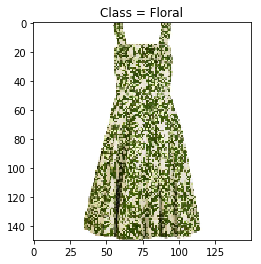

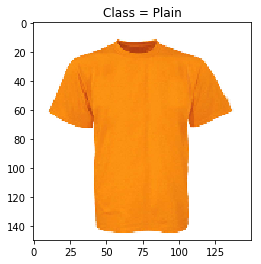

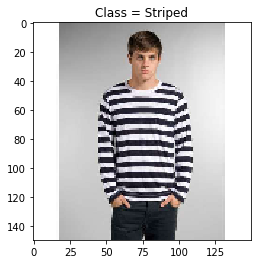

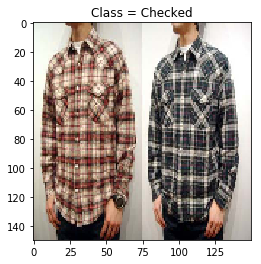

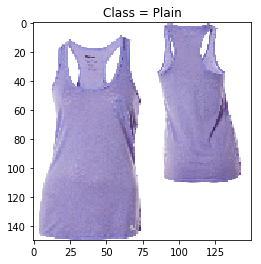

In [ ]:
import PIL
from PIL import Image
from IPython.display import display


for X_batch, Y_batch in train_generator:
    for i in range(5):
        show_sample(X_batch[i, :, :, :], np.argmax(Y_batch[i]))
    break

In [ ]:
def build_vgg16(framework='tf'):

    if framework == 'th':
        # build the VGG16 network in Theano weight ordering mode
        backend.set_image_dim_ordering('th')
    else:
        # build the VGG16 network in Tensorflow weight ordering mode
        backend.set_image_dim_ordering('tf')
        
    model = Sequential()
    if framework == 'th':
        model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))
    else:
        model.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height, 3)))
        
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    return model

weights_path = 'vgg16_weights.h5'
th_model = build_vgg16('th')

assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(th_model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    th_model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

tf_model = build_vgg16('tf')

for th_layer, tf_layer in zip(th_model.layers, tf_model.layers):
    if th_layer.__class__.__name__ == 'Convolution2D':
      kernel, bias = th_layer.get_weights()
      kernel = np.transpose(kernel, (2, 3, 1, 0))
      tf_layer.set_weights([kernel, bias])
    else:
      tf_layer.set_weights(tf_layer.get_weights())
    
top_model = Sequential()
print (Flatten(input_shape=tf_model.output_shape[1:]))
top_model.add(Flatten(input_shape=tf_model.output_shape[1:]))
top_model.add(Dense(512, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(5, activation='softmax'))
print (tf_model.summary())
print(top_model.summary())

Model loaded.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_14 (ZeroPadding2D) (None, 152, 152, 3)   0           zeropadding2d_input_2[0][0]      
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 150, 150, 64)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 152, 152, 64)  0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 150, 150, 64)  36928       zeropadding2d_15[0][0]           
_____________________________________________________________________________

In [ ]:
# add the model on top of the convolutional base
tf_model.add(top_model)

In [ ]:
#Freezing the weights of all layers except top

for layer in tf_model.layers[:-4]:
    layer.trainable = False
    
#Using an Adam optimizer with lower learning rate
adam1=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
tf_model.compile(loss = 'categorical_crossentropy',
              optimizer = adam1,
              metrics=['accuracy'])


In [ ]:
#Training the model for 5 epochs

#tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
checkpoint_callback = ModelCheckpoint('./models/vgg_weights_frozen_pattern.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 5,
        validation_data = validation_generator,
        nb_val_samples = nb_validation_samples,
        verbose = 1,
        initial_epoch = 0,
        callbacks=[checkpoint_callback]
)

Epoch 1/5
6150/8782 [====================>.........] - ETA: 142s - loss: 0.7720 - acc: 0.7345

/usr/local/lib/python2.7/dist-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


7050/8782 [=======================>......] - ETA: 93s - loss: 0.7459 - acc: 0.7428

/usr/local/lib/python2.7/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


8782/8782 [==============================] - 558s - loss: 0.7221 - acc: 0.7498 - val_loss: 0.5213 - val_acc: 0.8085
Epoch 2/5
8782/8782 [==============================] - 216s - loss: 0.4885 - acc: 0.8302 - val_loss: 0.5029 - val_acc: 0.8264
Epoch 3/5
8782/8782 [==============================] - 214s - loss: 0.3843 - acc: 0.8695 - val_loss: 0.4527 - val_acc: 0.8403
Epoch 4/5
8782/8782 [==============================] - 217s - loss: 0.3067 - acc: 0.8927 - val_loss: 0.4448 - val_acc: 0.8487
Epoch 5/5
8782/8782 [==============================] - 227s - loss: 0.2350 - acc: 0.9187 - val_loss: 0.5075 - val_acc: 0.8299


In [ ]:
accuracies = np.array([])
losses = np.array([])

i=0
for X_batch, Y_batch in validation_generator:
    loss, accuracy = tf_model.evaluate(X_batch, Y_batch, verbose=0)
    losses = np.append(losses, loss)
    accuracies = np.append(accuracies, accuracy)
    i += 1
    if i == 20:
       break
       
print("Validation: accuracy = %f  ;  loss = %f" % (np.mean(accuracies), np.mean(losses)))

Validation: accuracy = 0.836000  ;  loss = 0.489109


In [ ]:
#unfreezing the layers and recompiling the model 

for layer in tf_model.layers[:-4]:
    layer.trainable = True
    
#Using an Adam optimizer with lower learning rate
adam1=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
tf_model.compile(loss = 'categorical_crossentropy',
              optimizer = adam1,
              metrics=['accuracy'])

In [ ]:
#Loading weights with the best validation aaccuracy
tf_model.load_weights('./models/vgg_weights_frozen_pattern.hdf5')

In [ ]:
#Training the whole network for 5 epochs first
checkpoint_callback = ModelCheckpoint('./models/vgg_weights_best_pattern.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 10,
        validation_data = validation_generator,
        nb_val_samples = nb_validation_samples,
        verbose = 1,
        initial_epoch = 5,
        callbacks=[checkpoint_callback]
)

Epoch 6/10
8782/8782 [==============================] - 313s - loss: 0.5980 - acc: 0.7995 - val_loss: 0.5264 - val_acc: 0.8368
Epoch 7/10
8782/8782 [==============================] - 305s - loss: 0.3678 - acc: 0.8753 - val_loss: 0.3936 - val_acc: 0.8745
Epoch 8/10
8782/8782 [==============================] - 302s - loss: 0.2623 - acc: 0.9140 - val_loss: 0.4827 - val_acc: 0.8656
Epoch 9/10
8782/8782 [==============================] - 301s - loss: 0.2108 - acc: 0.9304 - val_loss: 0.5444 - val_acc: 0.8596
Epoch 10/10
8782/8782 [==============================] - 305s - loss: 0.2052 - acc: 0.9340 - val_loss: 0.4507 - val_acc: 0.8810


In [ ]:
accuracies = np.array([])
losses = np.array([])

i=0
for X_batch, Y_batch in validation_generator:
    loss, accuracy = tf_model.evaluate(X_batch, Y_batch, verbose=0)
    losses = np.append(losses, loss)
    accuracies = np.append(accuracies, accuracy)
    i += 1
    if i == 20:
       break
       
print("Validation: accuracy = %f  ;  loss = %f" % (np.mean(accuracies), np.mean(losses)))

Validation: accuracy = 0.864750  ;  loss = 0.516400


In [ ]:
tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 13,
        validation_data = validation_generator,
        nb_val_samples = nb_validation_samples,
        verbose = 1,
        initial_epoch = 10,
        callbacks=[checkpoint_callback]
)

Epoch 11/13
8782/8782 [==============================] - 308s - loss: 0.1195 - acc: 0.9586 - val_loss: 0.4826 - val_acc: 0.8844
Epoch 12/13
8782/8782 [==============================] - 301s - loss: 0.1045 - acc: 0.9677 - val_loss: 0.5192 - val_acc: 0.8715
Epoch 13/13
8782/8782 [==============================] - 303s - loss: 0.0867 - acc: 0.9719 - val_loss: 0.5477 - val_acc: 0.8467


Now the best model for pattern is saved in an hdf5 file. We do a similar run for all the categories of features and get models for each of those. 

Once we have the models , we now start the process of generating the repository of images and getting inputs to form the style profile. After that we use that to get recommendations based on a similarity model

## Generating Recommendations - Recommendation Model 

 Initialising the categories of features and the subclasses for each category

In [ ]:

class_part = {
    0: 'FullSleeve',
    1: 'HalfSleeve',
    2: 'Sleeveless'}
class_pattern = {
    0: 'Checked',
    1: 'Floral',
    2: 'Graphic',
    3: 'Plain',
    4: 'Striped'}
class_fabric = {
    0: 'Cotton',
    1: 'Crochet',
    2: 'Denim',
    3: 'Silk',
    4: 'Wool'}
class_color = {
    0: 'Black',
    1: 'Blue',
    2: 'Green',
    3: 'Red',
    4: 'White'}
class_style = {
    0: 'Casual',
    1: 'Formal',
    2: 'Party',
    3: 'Summer',
    4: 'Winter'}

Function to display images

In [ ]:
def show_sample(X):
    im = X
    plt.imshow(im)
    
    plt.axis('on')
    plt.show()

All the images to form the repository are in the folder "images" . These images are taken from online retail sites for shopping recommendation . It could be taken from web scraping for other applications as well

In [ ]:
img_width, img_height = 150, 150

imagelist = []
# top_model_weights_path = 'bottleneck_fc_model.h5'
image_data_dir = 'images/'
#chosenOnes = sorted(os.listdir(train_data_dir))
count = 0

test_datagen = ImageDataGenerator(rescale=1./255)

data1_generator = test_datagen.flow_from_directory(
        image_data_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,
        shuffle = False)






Found 9234 images belonging to 1 classes.


In [ ]:
# Reshaping the images array
nb_data_samples = 9234
c=0
images_valid=[]
for X_batch in data1_generator:
    c+=1
    if (c>nb_data_samples):
        break
    images_valid.append(X_batch[0,:,:,:])
    

data_images=np.asarray(images_valid)
print (data_images.shape)
#np.save("last_resort.npy",np.asarray(imagelist,dtype=np.uint8))

(9234, 150, 150, 3)


Loading all the models previously trained and saved

In [ ]:
pattern_model = load_model('./models/model_pattern_final.hdf5')
fabric_model = load_model('./models/model_fabric_final.hdf5')
color_model = load_model('./models/model_color_final.hdf5')
style_model = load_model('./models/model_style_final.hdf5')
part_model = load_model('./models/model_part_final.hdf5')
#part_model = load_model('my_model.h5')

Predicting the category features for images in repository

In [ ]:
pattern=pattern_model.predict(data_images)
fabric=fabric_model.predict(data_images)
color=color_model.predict(data_images)
style=style_model.predict(data_images)
part=part_model.predict(data_images)
print ("Pattern : " , pattern.shape)
print ("fabric : " , fabric.shape)
print ("color : " , color.shape)
print ("Style : " , style.shape) 
print ("Part : " , part.shape)

('Pattern : ', (9234, 5))
('fabric : ', (9234, 5))
('color : ', (9234, 5))
('Style : ', (9234, 5))
('Part : ', (9234, 3))


Showing predictions for 5 random images in repository

('Pattern : ', 'Floral')
('Fabric : ', 'Silk')
('Color : ', 'White')
('Style : ', 'Summer')
('Part : ', 'Sleeveless')


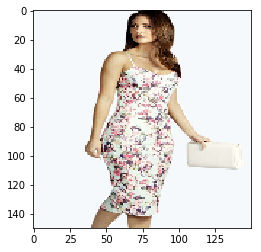

---------------------------------------------
('Pattern : ', 'Floral')
('Fabric : ', 'Silk')
('Color : ', 'White')
('Style : ', 'Summer')
('Part : ', 'HalfSleeve')


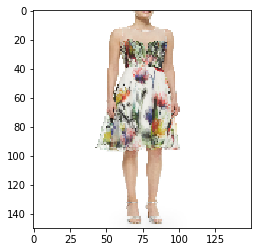

---------------------------------------------
('Pattern : ', 'Graphic')
('Fabric : ', 'Denim')
('Color : ', 'Blue')
('Style : ', 'Formal')
('Part : ', 'Sleeveless')


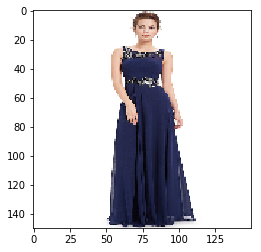

---------------------------------------------
('Pattern : ', 'Checked')
('Fabric : ', 'Denim')
('Color : ', 'Blue')
('Style : ', 'Formal')
('Part : ', 'Sleeveless')


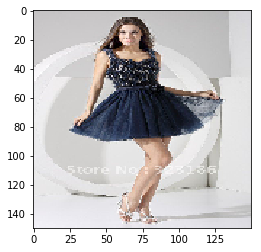

---------------------------------------------
('Pattern : ', 'Floral')
('Fabric : ', 'Wool')
('Color : ', 'Black')
('Style : ', 'Formal')
('Part : ', 'FullSleeve')


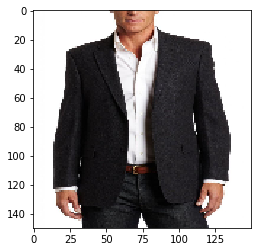

---------------------------------------------


In [ ]:
for i in range(10,15):
    
    #show_sample(data_images[i])
    print ("Pattern : " , class_pattern[np.argmax(pattern[i])])
    print ("Fabric : " , class_fabric[np.argmax(fabric[i])])
    print ("Color : " , class_color[np.argmax(color[i])])
    print ("Style : " , class_style[np.argmax(style[i])])
    print ("Part : " , class_part[np.argmax(part[i])])
    show_sample(data_images[i])
    print ("---------------------------------------------")

### Creating the fashion vector for images in repository

In [ ]:
feature_list=[]
for i in range(len(data_images)):
    vals=np.zeros(5)
    vals[0] = np.argmax(pattern[i])
    vals[1] = np.argmax(fabric[i])
    vals[2] = np.argmax(color[i])
    vals[3] = np.argmax(style[i])
    vals[4] = np.argmax(part[i])
    feature_list.append(vals)
    
print (feature_list[3])
feature_data = np.asarray(feature_list)
print (feature_data.shape)
#np.save("db_images.npy",data_images)
#np.save("db_features.npy",feature_data)

[ 2.  0.  0.  2.  1.]
(9234, 5)


## Getting input vectors

Input images i.e images of user with preferred clothes that would be used to form the style profile of that user is stored in input folder

In [ ]:
image_input_dir = 'input/'
inpdata_generator = test_datagen.flow_from_directory(
        image_input_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,
        shuffle = False)


Found 2 images belonging to 1 classes.


### Creating the input fashion vector

In [ ]:
nb_input_samples = 2
c=0
images_input=[]
for X_batch in inpdata_generator:
    c+=1
    if (c>nb_input_samples):
        break
    images_input.append(X_batch[0,:,:,:])
    

data_images_inp=np.asarray(images_input)
print (data_images_inp.shape)

(2, 150, 150, 3)


In [ ]:
inp_pattern=pattern_model.predict(data_images_inp)
inp_fabric=fabric_model.predict(data_images_inp)
inp_color=color_model.predict(data_images_inp)
inp_style=style_model.predict(data_images_inp)
inp_part=part_model.predict(data_images_inp)
print ("Pattern : " , inp_pattern.shape)
print ("Fabric : " , inp_fabric.shape)
print ("Color : " , inp_color.shape)
print ("Style : " , inp_style.shape) 
print ("Part : " , inp_part.shape) 

('Pattern : ', (2, 5))
('Fabric : ', (2, 5))
('Color : ', (2, 5))
('Style : ', (2, 5))
('Part : ', (2, 3))


#### Showing the input images with predicted values

('Pattern : ', 'Checked')
('Fabric : ', 'Denim')
('Color : ', 'White')
('Style : ', 'Formal')
('Part : ', 'FullSleeve')


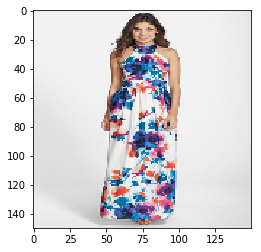

('Pattern : ', 'Plain')
('Fabric : ', 'Denim')
('Color : ', 'Blue')
('Style : ', 'Casual')
('Part : ', 'FullSleeve')


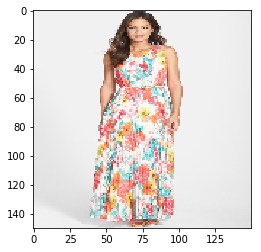

In [ ]:
for i in range(len(data_images_inp)):
    print ("Pattern : " , class_pattern[np.argmax(pattern[i])])
    print ("Fabric : " , class_fabric[np.argmax(fabric[i])])
    print ("Color : " , class_color[np.argmax(color[i])])
    print ("Style : " , class_style[np.argmax(style[i])])
    print ("Part : " , class_part[np.argmax(part[i])])
    show_sample(data_images_inp[i])

In [ ]:
inp_feature_list=[]
for i in range(len(data_images_inp)):
    vals=np.zeros(5)
    vals[0] = np.argmax(inp_pattern[i])
    vals[1] = np.argmax(inp_fabric[i])
    vals[2] = np.argmax(inp_color[i])
    vals[3] = np.argmax(inp_style[i])
    vals[3] = np.argmax(inp_part[i])
    inp_feature_list.append(vals)
    
inp_feature_data = np.asarray(inp_feature_list)
print (inp_feature_data.shape)

(2, 5)


### Similarity Function

In [ ]:
def similarity(feature_data,inp_feature_data):
    num_samp=inp_feature_data.size
#     print (num_samp)
    sim_score={}
    for i in range(len(feature_data)):
        score=0
#         show_sample(data_images[i])
#         print(feature_data[i])
        score_m= inp_feature_data - feature_data[i]
#         print (score_m)
        score = num_samp-np.count_nonzero(score_m)
        sim_score[i]=score
#         print (score)
    
    return sim_score


('Score : ', 10)


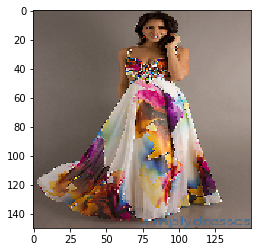

('Score : ', 10)


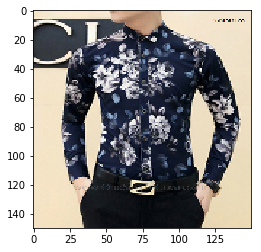

('Score : ', 10)


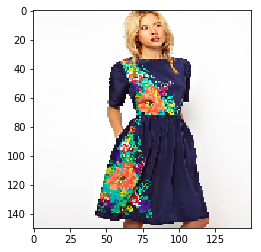

('Score : ', 10)


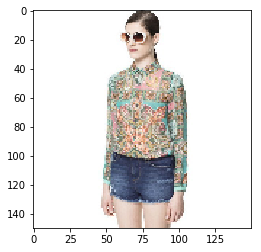

('Score : ', 10)


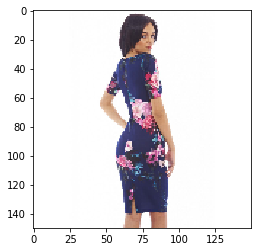

('Score : ', 10)


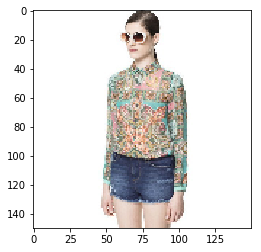

('Score : ', 10)


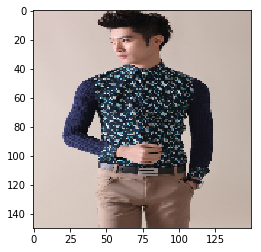

('Score : ', 8)


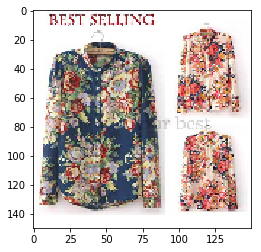

('Score : ', 8)


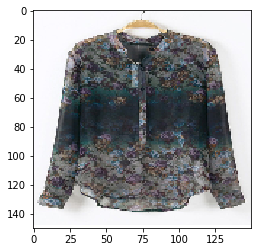

('Score : ', 8)


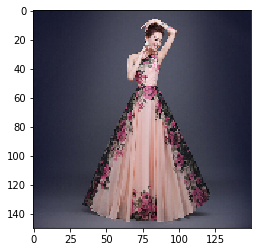

('Score : ', 8)


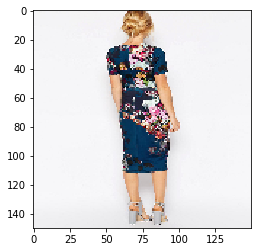

('Score : ', 8)


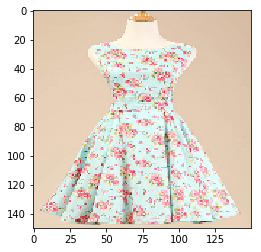

('Score : ', 8)


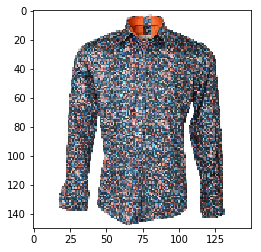

('Score : ', 8)


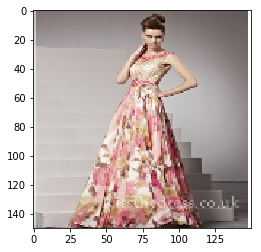

('Score : ', 8)


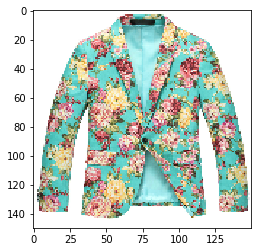

('Score : ', 8)


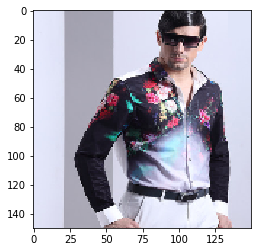

('Score : ', 8)


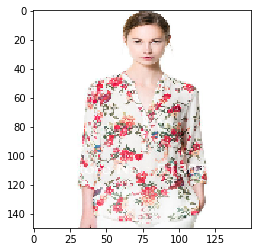

('Score : ', 8)


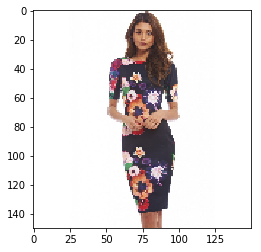

('Score : ', 8)


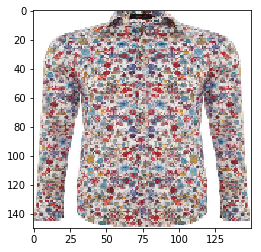

('Score : ', 8)


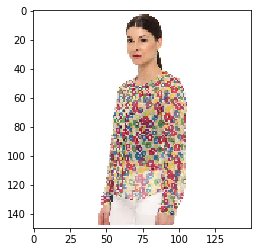

('Score : ', 8)


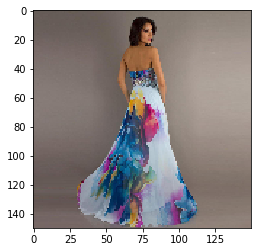

('Score : ', 8)


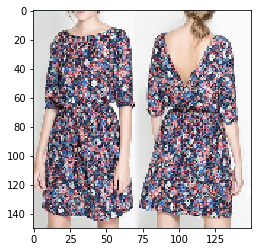

('Score : ', 8)


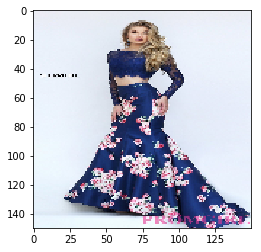

('Score : ', 8)


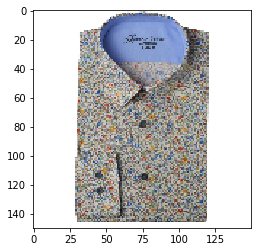

('Score : ', 8)


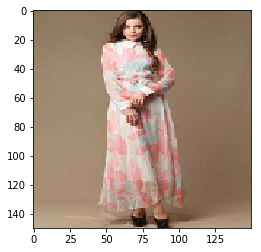

('Score : ', 8)


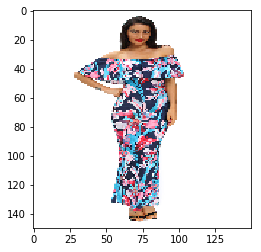

('Score : ', 8)


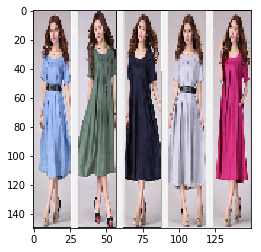

('Score : ', 8)


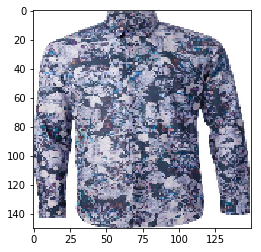

('Score : ', 8)


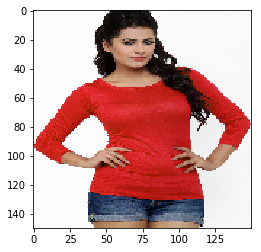

('Score : ', 8)


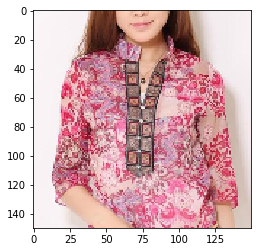

In [ ]:
similarities=similarity(feature_data,inp_feature_data)
sorted_similarities = sorted(similarities.items(), key=operator.itemgetter(1),reverse=True)
#print (sorted_similarities)
num_reco=30
num_data=feature_data.size
for i in range(num_reco):
    ind = sorted_similarities[i][0]
    print("Score : ", sorted_similarities[i][1])
    show_sample(data_images[ind])


## Citations 

1. Ziwei Liu, Ping Luo, Shi Qiu, Xiaogang Wang, and Xiaoou Tang  , DeepFashion: Powering Robust Clothes Recognition and Retrieval with Rich Annotations , June 2016
2. Yann LeCun, Yoshua Bengio  and Geoffrey Hinton , Deep learning , 2015
3. Karen Simonyan & Andrew Zisserman , Very deep convolutional networks for large scale image recognition , 2015
4. Bell, S., Upchurch, P., Snavely, N., and Bala, K. Material recognition in the wild with the materials in context database. CoRR, abs/1412.0623, 2014.
5. Chatfield, K., Simonyan, K., Vedaldi, A., and Zisserman, A. Return of the devil in the details: Delving deep into convolutional nets. In Proc. BMVC., 2014